In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-6.33045452, -5.23145212],
       [-1.12355599,  4.83732174],
       [-6.44935159, -6.671329  ],
       ...,
       [ 6.57064528, -0.92652959],
       [ 5.64624202, -0.7030655 ],
       [-7.08138897, -8.83444093]])

In [4]:
y

array([1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2,
       2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2,
       0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0,
       2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2,
       0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0,
       1, 2, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0,
       1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0,

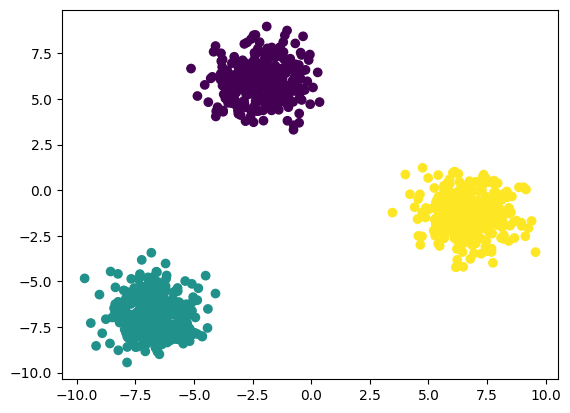

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1339.9999999999984,
 519.1023085476148,
 46.079638383126614,
 40.48671553196954,
 35.04711761756882,
 31.981093385907222,
 26.527478985776117,
 24.16181206839218,
 21.97197297184316,
 19.25149066429414]

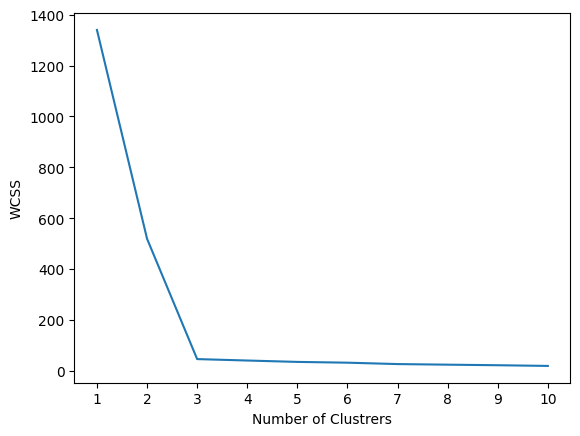

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1,
       0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1,
       2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2,
       0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 0,
       1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2,
       0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1,
       1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2,

In [17]:
y_pred=kmeans.predict(X_test_scaled)
y_pred

array([2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1,
       0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 0,
       2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1,
       0, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1,
       2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0,
       1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1,
       2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0,

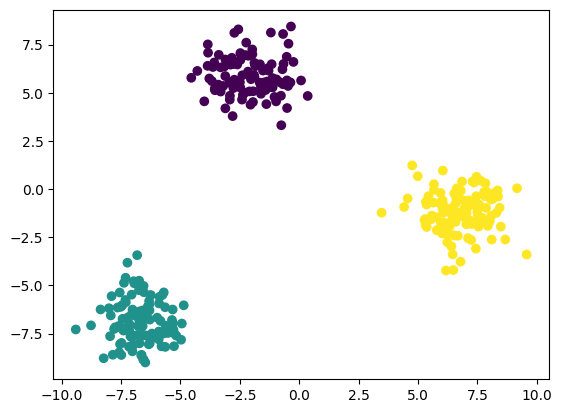

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
## Validating the k value
## 01. kneelocator
## 02. Silhoutee scoring

In [20]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [24]:
from kneed import KneeLocator

kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

print(kl.elbow)

3


In [27]:
from sklearn.metrics import silhouette_score

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [28]:
silhouette_coefficients

[np.float64(0.6445209369835627),
 np.float64(0.8490622005963392),
 np.float64(0.6743271149792626),
 np.float64(0.5033579063738313),
 np.float64(0.32347041718334435),
 np.float64(0.4903617450284368),
 np.float64(0.3338500606180925),
 np.float64(0.32684695104715894),
 np.float64(0.33010845360680824)]

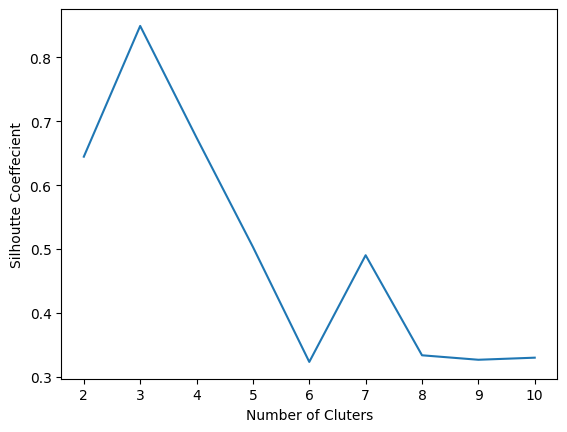

In [29]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()